<a href="https://colab.research.google.com/github/namnguyen9363/space/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis

#### Import necessary libraries

In [3]:
import pandas as pd
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


read CSV file

#### Read in updated dataframe

Read CSV file

In [4]:
all_data = pd.read_csv('all_data.csv')


In [5]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
60366,155129,ThinkPad Laptop,1,999.99,02/18/19 23:28,"911 Sunset St, San Francisco, CA 94016"
60367,155130,AAA Batteries (4-pack),3,2.99,02/21/19 19:49,"246 Maple St, New York City, NY 10001"
60368,155130,AA Batteries (4-pack),1,3.84,02/21/19 19:49,"246 Maple St, New York City, NY 10001"
60369,155131,Wired Headphones,1,11.99,02/27/19 15:22,"132 River St, Austin, TX 73301"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [6]:
all_data.dropna(inplace=True)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
60365,155128,iPhone,1,700,02/04/19 15:15,"274 Chestnut St, Los Angeles, CA 90001"
60366,155129,ThinkPad Laptop,1,999.99,02/18/19 23:28,"911 Sunset St, San Francisco, CA 94016"
60367,155130,AAA Batteries (4-pack),3,2.99,02/21/19 19:49,"246 Maple St, New York City, NY 10001"
60368,155130,AA Batteries (4-pack),1,3.84,02/21/19 19:49,"246 Maple St, New York City, NY 10001"


Get rid of text in order date column

In [7]:
all_data['month'] =all_data['Order Date'].str[0:2]

Deal with 'Or'

In [8]:
all_data= all_data[all_data['month']!='Or']

#### Make columns correct type

In [9]:
all_data['month'] = pd.to_numeric(all_data['month'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Add count collum and the earn

In [44]:
all_data['count']= 1
all_data['earn'] = (all_data['Quantity Ordered'])* (all_data['Price Each'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [11]:
month_sale = all_data.groupby(['month',],as_index=False).agg({'earn':'sum'}).sort_values('earn')
month_sale

,month,earn
6,9,2.096740e+03
2,3,2.229920e+03
0,1,8.670290e+03
4,5,1.055929e+04
1,2,8.880433e+05
5,8,2.242316e+06
3,4,3.385500e+06
7,12,4.610627e+06


In [12]:
fig2 = px.bar(month_sale, x=month_sale.month, y = month_sale.earn,title="Monthly sales",color=month_sale.month)
fig2.show()

Question 2: Which city was the best city for sales? How much?

In [13]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,count,earn
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,1,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99


Add city collumn

In [14]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,count,earn,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,1,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
60365,155128,iPhone,1,700.00,02/04/19 15:15,"274 Chestnut St, Los Angeles, CA 90001",2,1,700.00,Los Angeles
60366,155129,ThinkPad Laptop,1,999.99,02/18/19 23:28,"911 Sunset St, San Francisco, CA 94016",2,1,999.99,San Francisco
60367,155130,AAA Batteries (4-pack),3,2.99,02/21/19 19:49,"246 Maple St, New York City, NY 10001",2,1,8.97,New York City
60368,155130,AA Batteries (4-pack),1,3.84,02/21/19 19:49,"246 Maple St, New York City, NY 10001",2,1,3.84,New York City


In [27]:
### groupby city
by_city = all_data.groupby(['city'],as_index=False).agg({'earn':'sum'})
by_city.sort_values('earn')

,city,earn
1,Austin,585025.79
6,Portland,755224.98
0,Atlanta,886481.09
3,Dallas,893766.40
8,Seattle,925091.40
2,Boston,1192324.25
5,New York City,1522098.06
4,Los Angeles,1715236.44
7,San Francisco,2674793.36


In [33]:
###Chart
fig2 = px.bar( x=by_city.city, y = by_city.earn,color= by_city.city)
fig2.update_layout(
    title='City Revenue',
    xaxis_title="City",
    yaxis_title="Revenue")
fig2.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
#convert date to datetime
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [ ]:
#add new colum named hour
all_data['hour'] = all_data['Order Date'].apply(lambda x:x.hour)

In [41]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,count,earn,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,1,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,14


In [48]:
#groupby hour
hour = all_data.groupby(['hour'],as_index=False).agg({'count':'sum'})
hour.head(3)


,hour,count
0,0,1208
1,1,766
2,2,412


In [55]:
###Chart
fig2 = px.line( x=hour['hour'], y = hour['count'])
fig2.update_layout(
    title='Time we should display advertisements',
    xaxis_title="Hour",
    yaxis_title="Number")
fig2.show()

#### Question 4: What products are most often sold together?

In [79]:
often_sold = all_data[all_data['Order ID'].duplicated(keep=False)]
often_sold['group'] = often_sold.groupby('Order ID')['Product'].transform(lambda x: ", ".join(x))
often_sold1 = often_sold.groupby('group',as_index=False).agg({'count':'sum'}).sort_values('count',ascending=False)
often_sold = often_sold1.head(10)
often_sold

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,group,count
258,"iPhone, Lightning Charging Cable",552
136,"Google Phone, USB-C Charging Cable",544
268,"iPhone, Wired Headphones",252
226,"Vareebadd Phone, USB-C Charging Cable",204
253,"iPhone, Apple Airpods Headphones",200
145,"Google Phone, Wired Headphones",186
131,"Google Phone, Bose SoundSport Headphones",104
142,"Google Phone, USB-C Charging Cable, Wired Head...",84
230,"Vareebadd Phone, Wired Headphones",72
220,"Vareebadd Phone, Bose SoundSport Headphones",46


In [81]:
#chart
###Chart
fig2 = px.bar( x=often_sold['group'], y = often_sold['count'],color= often_sold['group'])
fig2.update_layout(
    title='Products are most often sold together?',
    xaxis_title="Things",
    yaxis_title="Number")
fig2.show()

#### What product sold the most? Why do you think it sold the most?

In [82]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,count,earn,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,1,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...,...
60365,155128,iPhone,1,700.00,2019-02-04 15:15:00,"274 Chestnut St, Los Angeles, CA 90001",2,1,700.00,Los Angeles,15
60366,155129,ThinkPad Laptop,1,999.99,2019-02-18 23:28:00,"911 Sunset St, San Francisco, CA 94016",2,1,999.99,San Francisco,23
60367,155130,AAA Batteries (4-pack),3,2.99,2019-02-21 19:49:00,"246 Maple St, New York City, NY 10001",2,1,8.97,New York City,19
60368,155130,AA Batteries (4-pack),1,3.84,2019-02-21 19:49:00,"246 Maple St, New York City, NY 10001",2,1,3.84,New York City,19


In [89]:
most_product = all_data.groupby(['Product'],as_index=False).agg({'count':'sum','Price Each':'mean'}).sort_values('count',ascending=False)
most_product

,Product,count,Price Each
15,USB-C Charging Cable,7016,11.95
12,Lightning Charging Cable,6987,14.95
5,AAA Batteries (4-pack),6713,2.99
4,AA Batteries (4-pack),6668,3.84
17,Wired Headphones,6104,11.99
6,Apple Airpods Headphones,4980,150.00
7,Bose SoundSport Headphones,4287,99.99
2,27in FHD Monitor,2371,149.99
18,iPhone,2214,700.00
3,34in Ultrawide Monitor,2057,379.99


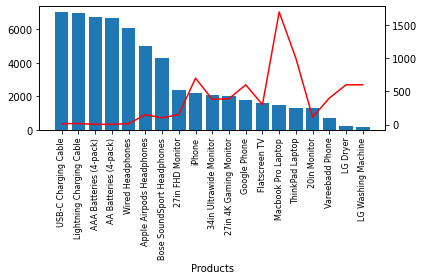

In [100]:

fig, ax1 = plt.subplots()

ax1.set_xlabel('Products')
ax1.bar(most_product['Product'], most_product['count'])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(most_product['Product'], most_product['Price Each'],color='r')
ax1.set_xticklabels(most_product['Product'],rotation='vertical',size=8)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()